In [1]:
pip install openml

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ---------------------------------------- 0.0/25.3 MB ? eta -:--:--
   ---------------------------------------- 0.3/25.3 MB ? eta -:--:--
    --------------------------------------- 0.5/25.3 MB 764.3 kB/s eta 0:00:33
   -- ------------------------------------- 1.3/25.3 MB 2.0 MB/s eta 0:00:12
   -- ------------------------------------- 1.8/25.3 MB 2.3 MB/s eta 0:00:11
   --- ------------------------------------ 2.4/25.3 MB 2.1 MB/s eta 0:00:11
   ---- ----------------------------------- 2.9/25.3 MB 2.4 MB/s eta 0:00:10
   ---- ----------------------------------- 3.1/25.3 MB 2.2 MB/s eta 0:00:10
   ----- ---------------------------------- 3.7/25.3 MB 2.2 MB/s e


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: C:\Users\Daphne\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


#### Question 1

   Number of Instances  Number of Features  Number of Classes  \
0               581012                  54                  7   

   Numerical Features  Categorical Features  Is Balanced  
0                  10                    44        False  


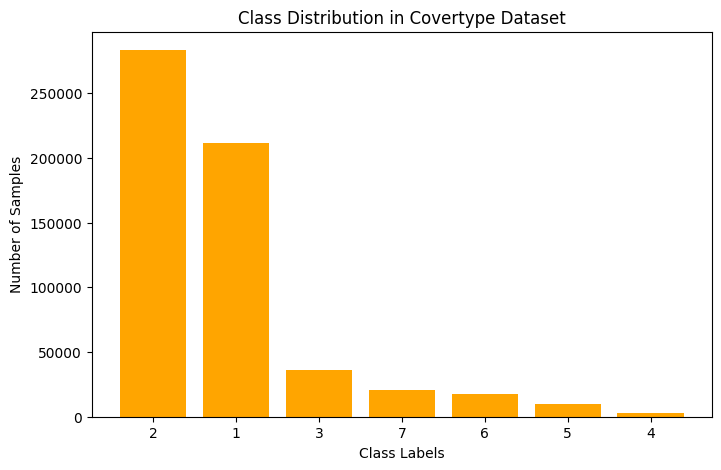

In [3]:
import openml
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# loading the Covertype dataset from OpenML (Dataset ID: 150)
dataset = openml.datasets.get_dataset(150)
X, y, _, _ = dataset.get_data(target=dataset.default_target_attribute)

# getting dataset details
num_instances, num_features = X.shape
num_classes = len(y.unique())

# determining categorical and numerical features
categorical_features = X.select_dtypes(include=["category", "object"]).shape[1]
numerical_features = num_features - categorical_features

# class distribution
class_counts = y.value_counts()

# checking if the dataset is balanced
class_distribution = class_counts / class_counts.sum()
is_balanced = class_distribution.max() - class_distribution.min() < 0.1  

# storing dataset summary
dataset_summary = pd.DataFrame({
    "Number of Instances": [num_instances],
    "Number of Features": [num_features],
    "Number of Classes": [num_classes],
    "Numerical Features": [numerical_features],
    "Categorical Features": [categorical_features],
    "Is Balanced": [is_balanced]
})

print(dataset_summary)

plt.figure(figsize=(8, 5))
plt.bar(class_counts.index, class_counts.values, color="orange")
plt.xlabel("Class Labels")
plt.ylabel("Number of Samples")
plt.title("Class Distribution in Covertype Dataset")
plt.show()


#### Question 2

In [6]:
import time
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# splitting dataset into training (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# defining training subset sizes (10%, 20%, ..., 100%)
subset_sizes = np.linspace(0.1, 1.0, 10)

# initializing results storage for decision tree classifier
dt_results = []

# training Decision Tree on different subsets
for size in subset_sizes:
    print(f"Training Decision Tree with {size * 100:.0f}% of training data...")

    if size == 1.0:
        X_sub, y_sub = X_train, y_train  # use full training set directly
    else:
        X_sub, _, y_sub, _ = train_test_split(X_train, y_train, train_size=size, random_state=42)

    # training Decision Tree
    dt_model = DecisionTreeClassifier(random_state=42)
    start_time = time.time()
    dt_model.fit(X_sub, y_sub)
    dt_train_time = time.time() - start_time
    dt_accuracy = accuracy_score(y_test, dt_model.predict(X_test))

    print(f"Decision Tree trained on {size * 100:.0f}% of data in {dt_train_time:.2f} sec")

    # storing results
    dt_results.append([size * 100, dt_accuracy, dt_train_time])

print("Completed all Decision Tree training")


# converting results to DataFrame
dt_results_df = pd.DataFrame(dt_results, columns=["Training Size (%)", "DT Accuracy", "DT Training Time"])

print(dt_results_df)


Training Decision Tree with 10% of training data...
Decision Tree trained on 10% of data in 1.53 sec
Training Decision Tree with 20% of training data...
Decision Tree trained on 20% of data in 2.50 sec
Training Decision Tree with 30% of training data...
Decision Tree trained on 30% of data in 3.75 sec
Training Decision Tree with 40% of training data...
Decision Tree trained on 40% of data in 4.99 sec
Training Decision Tree with 50% of training data...
Decision Tree trained on 50% of data in 6.20 sec
Training Decision Tree with 60% of training data...
Decision Tree trained on 60% of data in 7.60 sec
Training Decision Tree with 70% of training data...
Decision Tree trained on 70% of data in 9.02 sec
Training Decision Tree with 80% of training data...
Decision Tree trained on 80% of data in 10.37 sec
Training Decision Tree with 90% of training data...
Decision Tree trained on 90% of data in 11.70 sec
Training Decision Tree with 100% of training data...
Decision Tree trained on 100% of dat

In [7]:
from sklearn.ensemble import GradientBoostingClassifier

# initializing results storage for gradient boosting classifier
gb_results = []

# training Gradient Boosting on different subsets
for size in subset_sizes:
    print(f"Training Gradient Boosting with {size * 100:.0f}% of training data...")

    if size == 1.0:
        X_sub, y_sub = X_train, y_train  # using full training set directly
    else:
        X_sub, _, y_sub, _ = train_test_split(X_train, y_train, train_size=size, random_state=42)

    # training Gradient Boosting
    gb_model = GradientBoostingClassifier(random_state=42)  # default hyperparameters
    start_time = time.time()
    gb_model.fit(X_sub, y_sub)
    gb_train_time = time.time() - start_time
    gb_accuracy = accuracy_score(y_test, gb_model.predict(X_test))

    print(f"Gradient Boosting trained on {size * 100:.0f}% of data in {gb_train_time:.2f} sec")

    # storing results
    gb_results.append([size * 100, gb_accuracy, gb_train_time])

print("Completed all Gradient Boosting training")

# converting results to DataFrame
gb_results_df = pd.DataFrame(gb_results, columns=["Training Size (%)", "GB Accuracy", "GB Training Time"])

print(gb_results_df)


Training Gradient Boosting with 10% of training data...
Gradient Boosting trained on 10% of data in 84.41 sec
Training Gradient Boosting with 20% of training data...
Gradient Boosting trained on 20% of data in 170.25 sec
Training Gradient Boosting with 30% of training data...
Gradient Boosting trained on 30% of data in 256.27 sec
Training Gradient Boosting with 40% of training data...
Gradient Boosting trained on 40% of data in 345.74 sec
Training Gradient Boosting with 50% of training data...
Gradient Boosting trained on 50% of data in 484.52 sec
Training Gradient Boosting with 60% of training data...
Gradient Boosting trained on 60% of data in 577.06 sec
Training Gradient Boosting with 70% of training data...
Gradient Boosting trained on 70% of data in 681.58 sec
Training Gradient Boosting with 80% of training data...
Gradient Boosting trained on 80% of data in 783.08 sec
Training Gradient Boosting with 90% of training data...
Gradient Boosting trained on 90% of data in 874.82 sec
Tr

#### Question 3

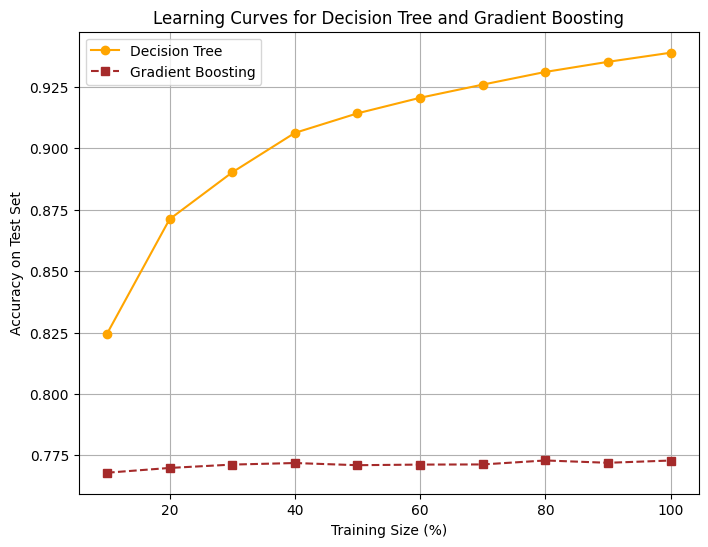

In [9]:
import matplotlib.pyplot as plt

# extracting decision tree results from the stored dataframe
dt_training_sizes = dt_results_df["Training Size (%)"].tolist()
dt_accuracies = dt_results_df["DT Accuracy"].tolist()

# extracting gradient boosting results from the stored dataframe
gb_training_sizes = gb_results_df["Training Size (%)"].tolist()
gb_accuracies = gb_results_df["GB Accuracy"].tolist()

# plotting learning curves
plt.figure(figsize=(8, 6))
plt.plot(dt_training_sizes, dt_accuracies, marker='o', linestyle='-', label='Decision Tree', color='orange')
plt.plot(gb_training_sizes, gb_accuracies, marker='s', linestyle='--', label='Gradient Boosting', color='brown')

plt.xlabel("Training Size (%)")
plt.ylabel("Accuracy on Test Set")
plt.title("Learning Curves for Decision Tree and Gradient Boosting")
plt.legend()
plt.grid(True)

plt.show()


#### Question 4

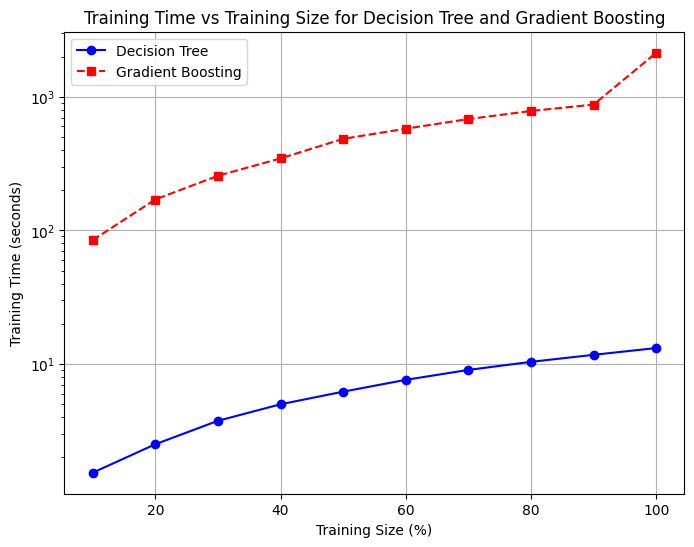

In [11]:
# extracting training times from stored dataframes
dt_training_sizes = dt_results_df["Training Size (%)"].tolist()
dt_training_times = dt_results_df["DT Training Time"].tolist()

gb_training_sizes = gb_results_df["Training Size (%)"].tolist()
gb_training_times = gb_results_df["GB Training Time"].tolist()

# plotting training time curves
plt.figure(figsize=(8, 6))
plt.plot(dt_training_sizes, dt_training_times, marker='o', linestyle='-', label='Decision Tree', color='blue')
plt.plot(gb_training_sizes, gb_training_times, marker='s', linestyle='--', label='Gradient Boosting', color='red')

plt.xlabel("Training Size (%)")
plt.ylabel("Training Time (seconds)")
plt.title("Training Time vs Training Size for Decision Tree and Gradient Boosting")
plt.yscale("log") # applying log scale to better see both models
plt.legend()
plt.grid(True)

plt.show()


#### Question 5

Based on the plots I generated in parts 3 and 4, I noticed that the Decision Tree Classifier consistently improves as training size increases, reaching approximately 94% accuracy at 100% training size. On the other hand, the Gradient Boosting Classifier remains around 77% accuracy in the Learning Curve plot, showing little improvement even with more training data. Therefore Decision Trees perform significantly better on this dataset in terms of accuracy. Additionally, I also noticed that the Decision Tree taining time remains low and scales slowly as training size increases, but Gradient Boosting training time grows exponentially, reaching over 2,000 seconds (around 35 minutes) at 100% training size. Thus, Decision Trees are also much faster to train compared to Gradient Boosting. Lastly, since the accuracy of the Decision Tree Classifier improves signficantly as dataset size increase, the Decision Tree Classifier benefits from more training data. The Gradient Boosting Classifier's accuracy however does not improve as the dataset size increases, which suggests that it may not generalize well to this dataset with its default hyperparameters, and therefore may need some hyperparameter tuning to perform better on this dataset. 